In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

sns.set()

from mnist import MNIST

def load_dataset():
    mndata = MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, X_test,labels_train,labels_test

In [20]:
x_train,x_test,labels_train,labels_test = load_dataset()

In [21]:
x_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

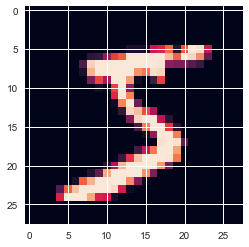

In [54]:
single_image = np.reshape(x_train[0][:],[28,28])
plt.imshow(single_image)
plt.show()
labels_train[0]
labels_onehot_train = np.zeros((np.max(np.size(labels_train)),10))
#labels_onehot_train[:,labels_train] = 1

In [55]:
type(labels_onehot_train)

numpy.ndarray

In [56]:
labels_onehot_train[3,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [57]:
labels_train[0]

5

In [58]:
labels_onehot_train[np.arange(len(labels_onehot_train)),labels_train]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [61]:
np.sum(labels_onehot_train[:,1])

0.0